# 데이터 EDA 연습3

## ★개요★ 

#### 1. 머신러닝 실습 진행중 시각화 및 EDA를 진행할 때 
#### 2. 미숙한 나의 모습을 발견하여 EDA에 대한 추가적인 공부가 필요하다고 생각하였다. 
#### 3. 이에, 무작정 EDA를 100개만 따라해보기로 하였다.
#### 4. 오늘은 3개의 EDA를 따라한 실습내용을 포스팅하고자 합니다. 

## ★학습한 내용★ 

1. 표준화(standardization) : 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환 (Z-score 표준화) : (측정값 - 평균) / 표준편차
2. 정규화(normalization) : 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환 (측정값 - 최소값) / (최대값 - 최소값)
3. 왜도 / 첨도에 대해서 다시 한 번 배우게 되었다. 

이렇게 실습을 통해서 스킬들을 다시 구현해보니 훨씬 와닿았다. 

In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

df_krx = fdr.StockListing("KRX")

In [2]:
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(7110, 10)

In [3]:
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [6]:
# stock_dict 타입확인
type(stock_dict)

# keys 값만 확인 
stock_dict.keys()

# values 값만 확인 
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

In [12]:
# 한개만이라도 잘 가져오는지 확인하기 윈한 코드 
# 삼성전자를 2020~2021까지 종가만 가져와보자! 

item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2020", "2022")["Close"]
    item_list.append(close)
len(item_list)

8

In [17]:
df=pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,55200,94700,118000,176762,314000,236000,107500,182500
2020-01-03,55500,94500,116000,174307,311000,237000,107500,181500
2020-01-06,55500,94300,116000,169888,307000,231000,106000,180500
2020-01-07,55800,94000,115500,174798,311000,232000,108000,187000
2020-01-08,56800,97400,112000,169888,302000,228000,105000,183000
...,...,...,...,...,...,...,...,...
2021-02-01,83000,125000,238500,371000,950000,253000,130500,348000
2021-02-02,84400,130000,240500,355500,965000,263000,132000,362500
2021-02-03,84600,130000,245500,347500,999000,262500,136500,370500


In [18]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [19]:
get_font_family()

'Malgun Gothic'

In [22]:
# 시각화를 위한 한글폰트 설정 
font_family = get_font_family()
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

In [23]:
df.head(2)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,55200,94700,118000,176762,314000,236000,107500,182500
2020-01-03,55500,94500,116000,174307,311000,237000,107500,181500


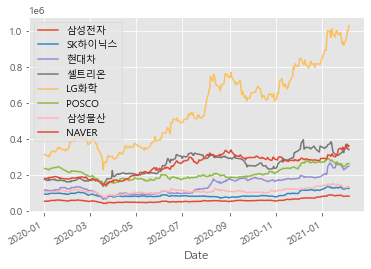

In [25]:
df.plot();

<AxesSubplot:xlabel='Date'>

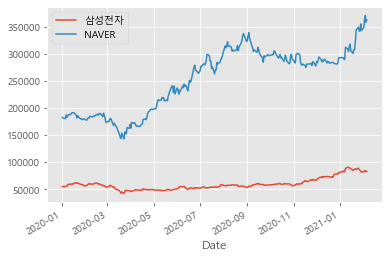

In [31]:
df[["삼성전자", "NAVER"]].plot()

지난 시간에도 보았던 것처럼 차이가 많이 나서 secondary_y를 써줘야겠군

<AxesSubplot:xlabel='Date'>

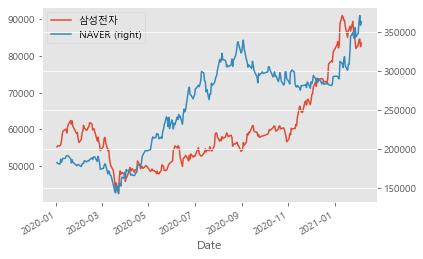

In [32]:
df[["삼성전자", "NAVER"]].plot(secondary_y="NAVER")

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) :
        데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) :
        데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        (측정값 - 최소값) / (최대값 - 최소값)

In [38]:
df2 = df[["삼성전자", "NAVER"]]
df_plot = df2 / df2.iloc[0] - 1

<AxesSubplot:xlabel='Date'>

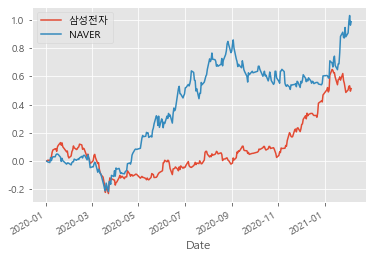

In [39]:
df_plot.plot()

<AxesSubplot:title={'center':'수익률 그래프'}, xlabel='Date'>

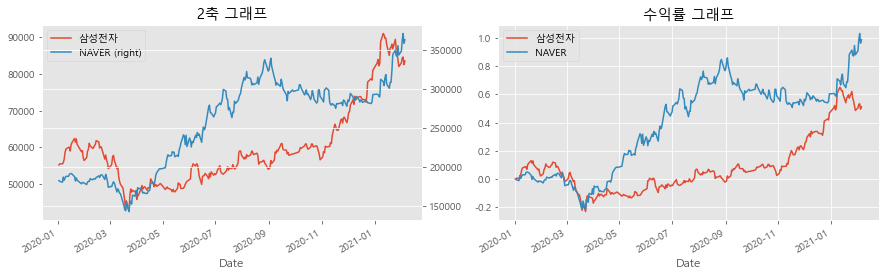

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

df[["삼성전자", "NAVER"]].plot(secondary_y="NAVER", ax=axes[0], title="2축 그래프")
df_plot.plot(ax=axes[1], title="수익률 그래프")

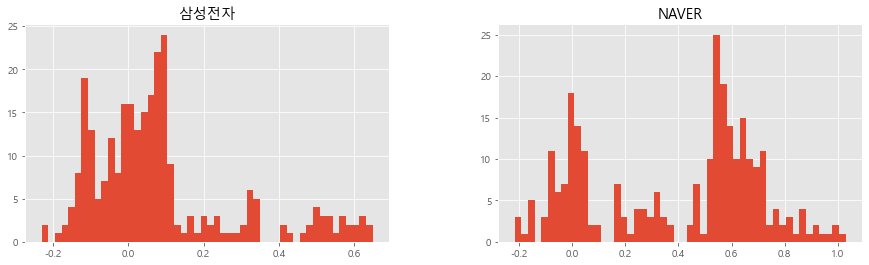

In [50]:
# 히스토그램을 통해 수익률을 한번 확인 할 수 있다. 
# 음수로 내려간 부분은 마이너스 수익률을 냈던 부분이고
# 삼성전자가 마이너스 수익률을 조금 많이 냈었네 
df_plot.hist(figsize=(15, 4), bins= 50);

In [51]:
df_norm = df / df.iloc[0] -1 

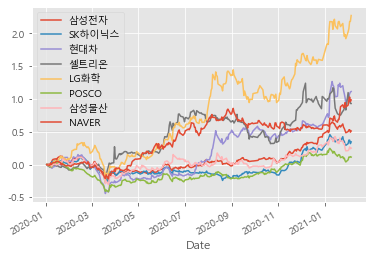

In [53]:
df_norm.plot();

In [54]:
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,0.083194,-0.022520,0.223300,0.461186,0.807267,-0.113080,0.045479,0.388770
std,0.194571,0.166181,0.403565,0.363956,0.670366,0.148363,0.134257,0.316516
min,-0.230072,-0.271383,-0.441525,-0.222225,-0.267516,-0.415254,-0.306977,-0.216438
25%,-0.043478,-0.129884,-0.152542,0.161109,0.189490,-0.218220,-0.027907,0.032877
50%,0.048913,-0.100317,0.110169,0.511105,0.681529,-0.150424,0.027907,0.531507
75%,0.105072,0.044351,0.516949,0.749997,1.292994,0.002119,0.111628,0.632877
max,0.648551,0.457233,1.266949,1.241664,2.273885,0.247881,0.427907,1.030137


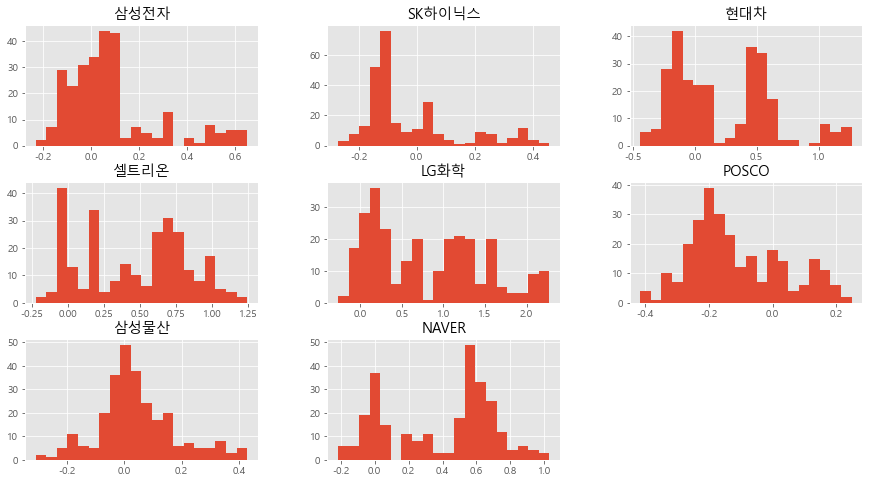

In [58]:
df_norm.hist(figsize=(15, 8), bins=20);

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [62]:
# skew로 수익률의 애도를 구해볼까요?
df_norm.skew()

삼성전자      1.304309
SK하이닉스    1.284302
현대차       0.628135
셀트리온     -0.040912
LG화학      0.407334
POSCO     0.532232
삼성물산      0.527580
NAVER    -0.278010
dtype: float64

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)

In [61]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

삼성전자      1.117778
SK하이닉스    0.630948
현대차      -0.362974
셀트리온     -1.254663
LG화학     -0.976006
POSCO    -0.589631
삼성물산      0.657816
NAVER    -1.244378
dtype: float64